### Contents:

#### 1.) Exploratory Data Analysis
* 1.1) Relationship with Numeric Variables
* 1.2) Relationship with Categorical Variables

#### 2.) Feature Engineering
* 2.1) For Categorical Variables
* 2.2) For Numerical Variables

#### 3) Recursive Feature Engineering (Dimensionality Reduction)
* 3.1) RFE (LogisticRegression)
* 3.2) RFE (RandomForestClassifier)
* 3.3) RFE (DecisionTreeClassifier)
* 3.4) RFE (AdaBoostClassifier)

#### 4.) Simple Model
* Try different models & check accuracy with classification metrics

#### 5.) Solving data imbalanced problem
* Resampling techniques & Ensemble Methods

#### 6) Hypertuning Parameters
* 6.1) Hypertuning LogisticRegression
* 6.2) Hypertuning AdaBoostClassifier

#### 7) Final apply on test data for sample submission

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

%cd D:\IPython Jupyter\Analytics Vidya Datasets

D:\IPython Jupyter\Analytics Vidya Datasets


In [9]:
df = pd.read_csv('train.csv')
print(df.shape, df.columns)
df.head()

(116058, 29) Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


### 1.) Exploratory Data Analysis

In [10]:
# Missing value in data
df.isnull().sum().sum()

0

In [11]:
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (116058, 24) Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')
categorical_features:  (116058, 5) Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')


#### 1.1) Relationship with Numeric Variables
* Description, Skewness, Kurtosis, Histograms, Boxplots(relationship with m13), Correlation Matrix

In [12]:
numerical_features.iloc[:,:11].describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000


In [13]:
# skewness & kurtosis
pd.DataFrame({"Skewness": df.skew(), "Kurtosis": df.kurt()})

,Kurtosis,Skewness
loan_id,-1.197545,0.004114
interest_rate,0.169871,0.051326
unpaid_principal_bal,0.556988,0.897524
loan_term,-1.293404,-0.692948
loan_to_value,0.078106,-0.765251
number_of_borrowers,-1.856090,-0.379397
debt_to_income_ratio,-0.825119,-0.194303
borrower_credit_score,48.502768,-3.570945
insurance_percent,5.871008,2.743691
co-borrower_credit_score,-1.849904,-0.362473


* If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric

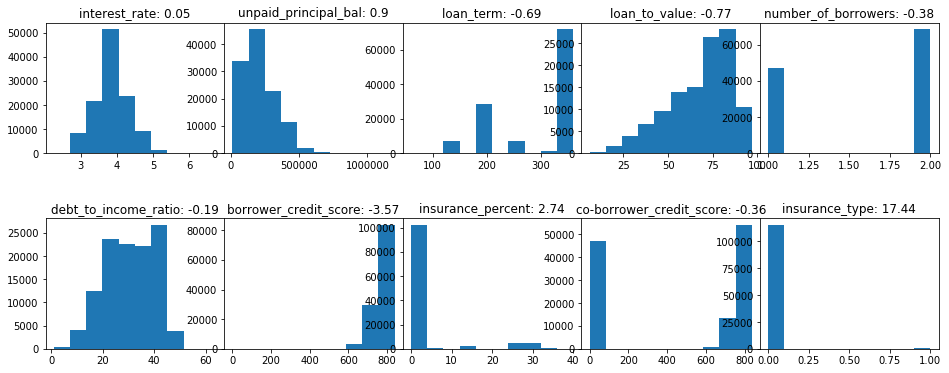

In [14]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))

* 'interest_rate': normally distributed
* 'unpaid_principal_bal': moderately right skewed
* 'loan_term': moderately left skewed
* 'loan_to_value': moderately left skewed
* 'number_of_borrowers': symmetric (unique data point: 2)
* 'debt_to_income_ratio': normally distributed
* 'borrower_credit_score': left skewed (missing datapoints if 0?)
* 'insurance_percent': right skewed (mostly not insured)
* 'co-borrower_credit_score': left skewed (mostly not applicable, when # borrowers = 1)
* 'insurance_type': mostly 0 (Premium paid by borrower)
* 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13': Highly skewed (mostly zeros)

In [15]:
numerical_features['m13'].value_counts()      # data is highly imbalance

0    115422
1       636
Name: m13, dtype: int64

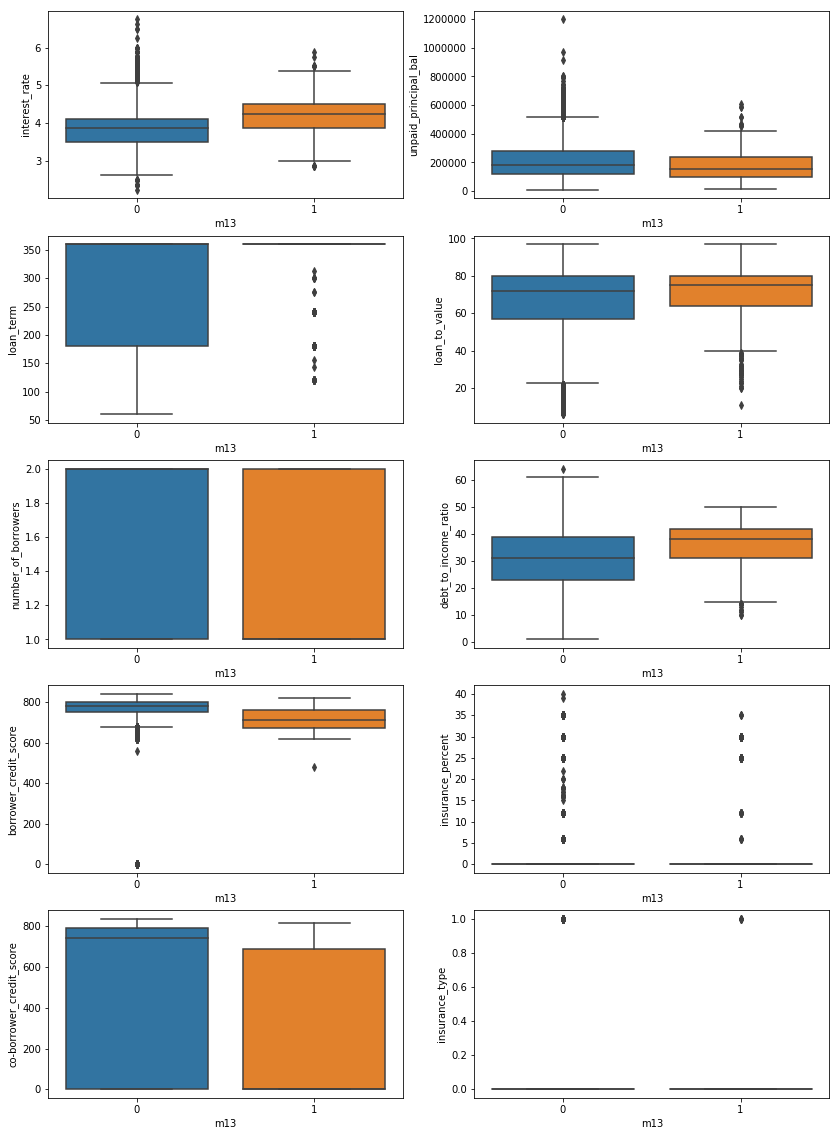

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'm13', y = i, data =numerical_features,ax=j)

* If 'borrower_credit_score is low, delinquency chances are high.
* If 'debt_to_income_ratio' is high, delinquency chances are high.
* If 'interest_rate' is high, delinquency chances are high.
* Other variables are not showing any significant relationship with m13 delinquency

In [17]:
cols = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
for i in cols:
    print(pd.crosstab(numerical_features[i],numerical_features['m13']))

m13       0    1
m1              
0    115140  589
1       250   43
2        27    3
3         5    1
m13       0    1
m2              
0    115261  583
1       153   43
2         5    8
3         2    1
4         1    1
m13       0    1
m3              
0    115287  581
1       125   42
2         6    8
3         1    3
4         2    1
5         1    1
m13       0    1
m4              
0    115307  553
1       104   64
2         6   10
3         3    5
4         1    2
5         0    1
6         1    1
m13       0    1
m5              
0    115234  518
1       169   80
2        10   23
3         5    7
4         2    4
5         1    2
6         0    1
7         1    1
m13       0    1
m6              
0    115265  520
1       145   69
2         5   21
3         4   12
4         3    6
5         0    4
6         0    2
7         0    1
8         0    1
m13       0    1
m7              
0    115236  492
1       170   96
2        11   17
3         1   12
4         2    6
5         2   

In [18]:
df[cols].max(axis=0)

m1      3
m2      4
m3      5
m4      6
m5      7
m6      8
m7      9
m8     10
m9     11
m10    12
m11    13
m12    14
dtype: int64

* m1 to m12: if delinquency is present only in later half of year, then chances of delinquency in m13 would be high
* m1: Few values are 3, means first payment done after 3 months of 'origination_date'

In [19]:
# creating new column: maximum deliquency time month
df['max_deliq'] = df[cols].max(axis=1)

           max_deliq
count  116058.000000
mean        0.023325
std         0.235048
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.000000
m13             0    1
max_deliq             
0          113814  233
1            1497  229
2              78   66
3              18   39
4               8   18
5               2   10
6               1   13
7               2   10
8               2    5
9               0    4
10              0    4
11              0    4
14              0    1


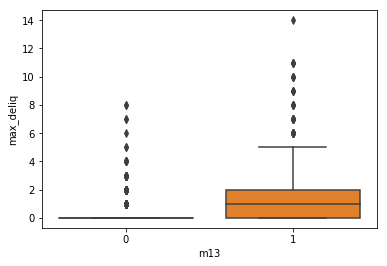

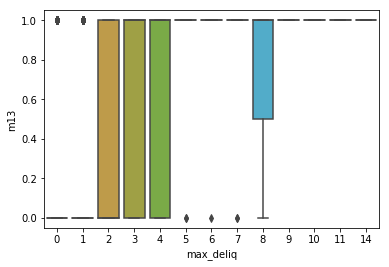

In [20]:
print(df[['max_deliq']].describe())
print(pd.crosstab(df['max_deliq'],df['m13']))
sns.boxplot('m13','max_deliq',data=df)
plt.show()
sns.boxplot('max_deliq','m13',data=df)

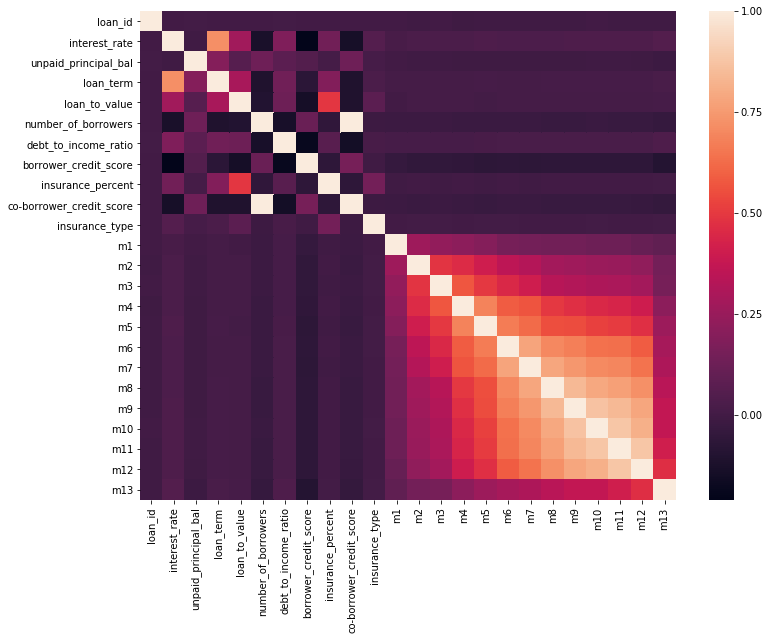

In [21]:
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

In [22]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

,VIF Factor,features
0,5.460580,loan_id
1,2.166196,interest_rate
2,1.119231,unpaid_principal_bal
3,2.309670,loan_term
4,1.423870,loan_to_value
5,58.742619,number_of_borrowers
6,1.084515,debt_to_income_ratio
7,0.493528,borrower_credit_score
8,1.344911,insurance_percent
9,60.138336,co-borrower_credit_score


* Multi-collinearity between m1 to m12 variables (mostly 2nd half of year)
* 'number_of_borrowers' & 'co-borrower_credit_score' are correlated to each other (will drop 'co-borrower_credit_score')

#### 1.2) Relationship with Categorical Variables

In [23]:
categorical_features.shape, categorical_features.columns

((116058, 5), Index(['source', 'financial_institution', 'origination_date',
        'first_payment_date', 'loan_purpose'],
       dtype='object'))

In [24]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for source 3
Value Counts for source 
 X    63858
Y    37554
Z    14646
Name: source, dtype: int64 

Total unique values for financial_institution 19
Value Counts for financial_institution 
 OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64 

Total unique values for origination_date 3

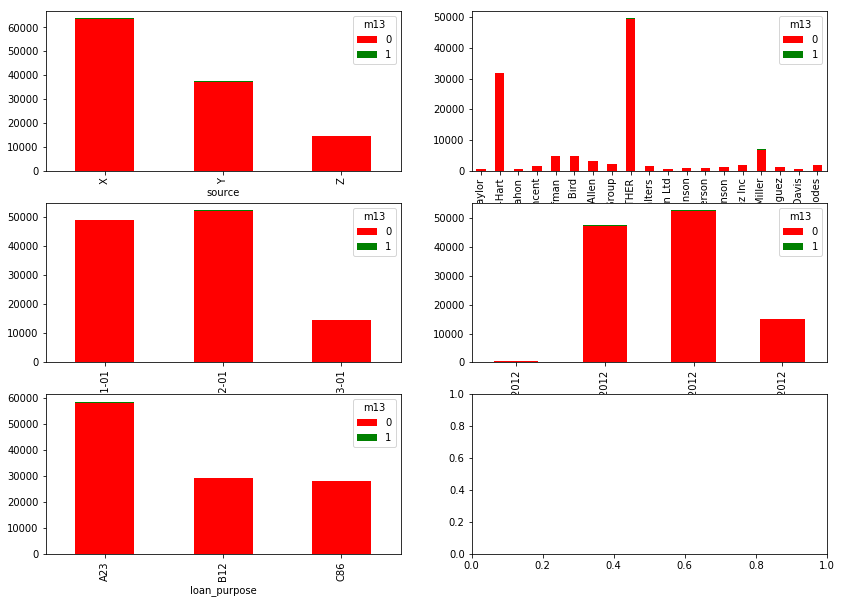

In [25]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
AX = [ax1, ax2, ax3, ax4, ax5]

for i,j in zip(categorical_features.columns.to_list(),AX):
    temp = pd.crosstab(df[i],df['m13'])
    temp.plot(kind='bar',stacked=True,color=['red','green'],grid=False,ax=j)

* Counts of m13 (when=1) are very low, so above bar graph don't make any sense, let's look at crosstab only

In [26]:
for i in categorical_features.columns.to_list():
    print(pd.crosstab(df[i],df['m13']))

m13         0    1
source            
X       63553  305
Y       37307  247
Z       14562   84
m13                              0    1
financial_institution                  
Anderson-Taylor                480    3
Browning-Hart                31677  175
Chapman-Mcmahon                388    0
Cole, Brooks and Vincent      1630   12
Edwards-Hoffman               4816   41
Martinez, Duffy and Bird      4692   23
Miller, Mcclure and Allen     3139   19
Nicholson Group               2105   11
OTHER                        49430  269
Richards-Walters              1454    5
Richardson Ltd                 472    1
Romero, Woods and Johnson      748    2
Sanchez, Hays and Wilkerson    851    2
Sanchez-Robinson              1192    1
Suarez Inc                    1785    5
Swanson, Newton and Miller    6828   46
Taylor, Hunt and Rodriguez    1255    4
Thornton-Davis                 648    3
Turner, Baldwin and Rhodes    1832   14
m13                   0    1
origination_date            
2012-01

* Deliquency in m13 is there when;
    * 'source' is either X or Y
    * 'financial_institution' is either 'Browning-Hart' or 'Other'
    * 'origination_date' is either Jan-12 or Feb-12
    * 'first_payment_date' is either Mar-12 or Apr-12
    * 'loan_purpose': either 'B12' or 'C86' (relatively)
* Above interpretation may not be true because mostly data also lies in these categories, so as deliquency

### 2.) Feature Engineering

#### 2.1) For Categorical Variables

In [27]:
# Loading raw_data again

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

df_train.shape, df_test.shape, df_sample_submission.shape

((116058, 29), (35866, 28), (35866, 2))

In [28]:
df_train['origination_date'].unique(), df_train['first_payment_date'].unique()

(array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object),
 array(['05/2012', '03/2012', '04/2012', '02/2012'], dtype=object))

In [29]:
df_test['origination_date'].unique(), df_test['first_payment_date'].unique()

(array(['01/02/12', '01/01/12', '01/03/12'], dtype=object),
 array(['Apr-12', 'Mar-12', 'May-12', 'Feb-12'], dtype=object))

In [30]:
df_test['m13'] = 'NA'
df = df_train.append(df_test, ignore_index=True)
print(df.shape)

(151924, 29)


In [31]:
# Dates in both train & test data are objects, so will use pandas's map function & generate new column as first payment delay (in months)
df['origination_date'] = df['origination_date'].map({"2012-01-01": 1, "2012-02-01": 2, "2012-03-01": 3,
                                                     "01/01/12": 1, "01/02/12": 2, "01/03/12": 3})
df['first_payment_date'] = df['first_payment_date'].map({"02/2012":2, "03/2012":3, "04/2012":4, "05/2012":5,
                                                         "Feb-12":2, "Mar-12":3, "Apr-12":4, "May-12":5})

df['first_payment_delay'] = df['first_payment_date'] - df['origination_date']
pd.crosstab(df['first_payment_delay'], df['m13'])

m13,0,1,NA
first_payment_delay,,,
1,2976,17,884
2,108719,605,33878
3,3727,14,1104


In [32]:
df.isnull().sum().sum()

0

* 95% of deliquency is there when first payment delay is of 2 months, however it also doesn't help us because 83% of data comes under this category only (first payment delay: 2 months)

* Deliquency in m13 is there when;
    * 'source' is either X or Y
    * 'financial_institution' is either 'Browning-Hart' or 'Other'
    * 'origination_date' is either Jan-12 or Feb-12
    * 'first_payment_date' is either Mar-12 or Apr-12
    * 'loan_purpose': either 'B12' or 'C86' (relatively)
* Above interpretation may not be true because mostly data also lies in these categories, so as deliquency

In [33]:
df['financial_institution_new'] = df['financial_institution'].apply(lambda x: 1 if (x == 'Browning-Hart') or (x == 'Others') else 0)
df['source_new'] = df['source'].apply(lambda x: 1 if (x == 'X') or (x == 'Y') else 0)
print(df['financial_institution_new'].value_counts())
print(df['source_new'].value_counts())

0    109994
1     41930
Name: financial_institution_new, dtype: int64
1    132779
0     19145
Name: source_new, dtype: int64


In [34]:
# One hot encoding for categorical variables
temp = pd.get_dummies(df['financial_institution'])
df = df.join(temp)
print(df.shape)

temp = pd.get_dummies(df['source'])
df = df.join(temp)
print(df.shape)

temp = pd.get_dummies(df['loan_purpose'])
df = df.join(temp)
print(df.shape)


(151924, 51)
(151924, 54)
(151924, 57)


#### 2.2) For Numerical Variables

In [35]:
cols = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

# creating new column: maximum deliquency time month
df['max_deliq'] = df[cols].max(axis=1)

# if 'm12'>0 then 1 else 0
df['m12_new'] = df['m12'].apply(lambda x: 1 if x > 0 else 0)
print(df['m12_new'].value_counts())
print(pd.crosstab(df['m12_new'],df['m13']))

# if delinquency is there in any of last 3 months
df['last3_months'] = 0
df.loc[(df['m10'] > 0) | (df['m11'] > 0) | (df['m12'] > 0),'last3_months'] = 1

print(df['last3_months'].value_counts())
pd.crosstab(df['last3_months'],df['m13'])

0    151281
1       643
Name: m12_new, dtype: int64
m13           0    1     NA
m12_new                    
0        115221  336  35724
1           201  300    142
0    150753
1      1171
Name: last3_months, dtype: int64


m13,0,1,NA
last3_months,,,
0,114864,279,35610
1,558,357,256


In [37]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'first_payment_delay', 'financial_institution_new', 'source_new',
       'Anderson-Taylor', 'Browning-Hart', 'Chapman-Mcmahon',
       'Cole, Brooks and Vincent', 'Edwards-Hoffman',
       'Martinez, Duffy and Bird', 'Miller, Mcclure and Allen',
       'Nicholson Group', 'OTHER', 'Richards-Walters', 'Richardson Ltd',
       'Romero, Woods and Johnson', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Swanson, Newton and Miller',
       'Taylor, Hunt and Rodriguez', 'Thornton-Davis',
       'Turner, Baldwin and Rhodes', 'X', '

In [56]:
# Droping loan_id, dates & other categorical variables 
df1 = df.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','loan_purpose'],axis=1)

### 3) Recursive Feature Engineering (Dimensionality Reduction)

In [57]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier

In [58]:
train = df1.iloc[:116058,:]
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.1)
X = xtrain
y = ytrain

#### 3.1) RFE (LogisticRegression)

In [60]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = LogisticRegression(solver='warn')
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
1.0
1.0
['number_of_borrowers' 'm13' 'first_payment_delay' 'source_new' 'Z' 'A23'
 'm12_new' 'last3_months'] 

Top features:  10
1.0
1.0
['number_of_borrowers' 'm13' 'first_payment_delay' 'source_new' 'Z' 'A23'
 'B12' 'C86' 'm12_new' 'last3_months'] 

Top features:  12
1.0
1.0
['number_of_borrowers' 'm13' 'first_payment_delay' 'source_new' 'X' 'Z'
 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  15
1.0
1.0
['number_of_borrowers' 'm13' 'first_payment_delay' 'source_new'
 'Browning-Hart' 'OTHER' 'X' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq'
 'm12_new' 'last3_months'] 

Top features:  20
1.0
1.0
['number_of_borrowers' 'm10' 'm13' 'first_payment_delay'
 'financial_institution_new' 'source_new' 'Browning-Hart' 'OTHER'
 'Suarez Inc' 'Swanson, Newton and Miller' 'Taylor, Hunt and Rodriguez'
 'X' 'Y' 'Z' 'A23' 'B12' 'C86' 'max_deliq' 'm12_new' 'last3_months'] 



#### 3.2) RFE (RandomForestClassifier)

In [31]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  6
0.9991862290813005
0.3829787234042553
['unpaid_principal_bal' 'loan_to_value' 'debt_to_income_ratio'
 'borrower_credit_score' 'm12_new' 'last3_months'] 

Top features:  7
0.9992245241833569
0.41304347826086957
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'max_deliq' 'm12_new'] 

Top features:  8
0.9992149504078428
0.36363636363636365
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'max_deliq' 'm12_new'
 'last3_months'] 

Top features:  10
0.9993298357140121
0.4565217391304348
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score'
 'financial_institution_new' 'max_deliq' 'm12_new' 'last3_months'] 

Top features:  12
0.9992149504078428
0.38636363636363635
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'number_of_borrowers' 'debt_to_income_ratio' 'borrower_credit_score'
 'insur

#### 3.3) RFE (DecisionTreeClassifier)

In [32]:
n_feat = [6,7,8,10,12,15]
for n in n_feat:
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  6
1.0
0.27210884353741494
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'm12_new'] 

Top features:  7
1.0
0.3120567375886525
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'max_deliq' 'm12_new'] 

Top features:  8
1.0
0.3
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'max_deliq' 'm12_new'] 

Top features:  10
1.0
0.32116788321167883
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'number_of_borrowers' 'debt_to_income_ratio' 'borrower_credit_score'
 'financial_institution_new' 'max_deliq' 'm12_new'] 

Top features:  12
1.0
0.3
['interest_rate' 'unpaid_principal_bal' 'loan_term' 'loan_to_value'
 'number_of_borrowers' 'debt_to_income_ratio' 'borrower_credit_score'
 'insurance_percent' 'financial_institution_new' 'max_deliq' 'm12_new'
 'last3_months'] 

Top features:  15
1

#### 3.4) RFE (AdaBoostClassifier)

In [184]:
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = AdaBoostClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.9958737027534178
0.4
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'co-borrower_credit_score'
 'max_deliq' 'm12'] 

Top features:  10
0.9959598667330448
0.4516129032258065
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'co-borrower_credit_score'
 'max_deliq' 'm9' 'm11' 'm12'] 

Top features:  12
0.9959598667330448
0.4516129032258065
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'debt_to_income_ratio' 'borrower_credit_score' 'co-borrower_credit_score'
 'max_deliq' 'm7' 'm8' 'm9' 'm11' 'm12'] 

Top features:  15
0.9959598667330448
0.4516129032258065
['interest_rate' 'unpaid_principal_bal' 'loan_to_value'
 'number_of_borrowers' 'debt_to_income_ratio' 'borrower_credit_score'
 'insurance_percent' 'co-borrower_credit_score' 'source_new' 'max_deliq'
 'm7' 'm8' 'm9' 'm11' 'm12'] 

Top features:  20
0.9959598667330448
0.4516129032258065
['interest_rate

* After running above different models with RFE techniques (in various combinations): following features are explaining delinquency in m13 month mostly;
    * 'interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'source_new','max_deliq' ,'m11', 'm12']
    * Will try to add other columns as well if they are of any help

### 4.) Simple Model
* Try different models followed by confusion matrix, ROC curve and other accuracy measures on best model

In [61]:
# Important columns based on Recursive Feature Engineering
# cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
#         'first_payment_delay', 'max_deliq', 'm12_new', 'last3_months']                        # Top 10 from all above 4 models

# cols = ['interest_rate', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score','insurance_type',
#         'first_payment_delay','source_new', 'max_deliq', 'm12_new', 'last3_months']           # Top 10 from LogisticRegression

# cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
#         'source_new', 'max_deliq', 'm12_new', 'last3_months']                                 # Top 10 from AdaBoostClassifier

cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10

In [62]:
# train = df1.iloc[:116058,:]
# test = df1.iloc[116058:,:]
train = df1.iloc[:116058,:][cols]
test = df1.iloc[116058:,:][cols]

In [63]:
def simple_model(alg):

    # splitting data into training and validation set
    xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [64]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)

LR
f1_score: 0.0
Accuracy on train data: 0.9942485405941021
Accuracy on test data: 0.9940978804066862
DTC
f1_score: 0.3542435424354244
Accuracy on train data: 1.0
Accuracy on test data: 0.9924607961399277
RFC
f1_score: 0.45555555555555555
Accuracy on train data: 0.9991383581414385
Accuracy on test data: 0.9957780458383595
ETC
f1_score: 0.419889502762431
Accuracy on train data: 1.0
Accuracy on test data: 0.9954764776839565
ABC
f1_score: 0.4598930481283423
Accuracy on train data: 0.9958533485556729
Accuracy on test data: 0.9956488023436154
GBC
f1_score: 0.23076923076923078
Accuracy on train data: 0.9951532645455916
Accuracy on test data: 0.9948302602102361


* AdaBoostClassifier is giving highest f1 score (0.46): Need to fine tune it's parameters in order to get better results
* All model are giving 100% accuracy on both train & test data; need to look at ROC curve & decide threshold value

In [66]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[23068    16]
 [   85    43]]


* Out of 128 delinquency cases, only 44 of them predicted as True positive, remaining (84) are predicted as False Positive

In [67]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.73      0.34      0.46       128

    accuracy                           1.00     23212
   macro avg       0.86      0.67      0.73     23212
weighted avg       0.99      1.00      0.99     23212



* For non-delinquent cases(0) precision, recall, f1-score are too good, but problem comes in case of delinquent cases(1). That's because data is highly imbalance towards non-delinquent cases(0)

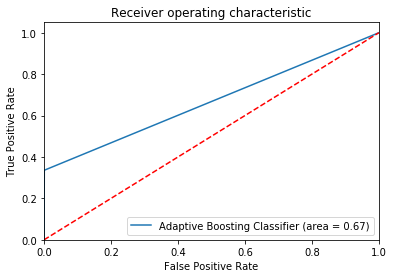

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Adaptive Boosting Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

* AUC is 67%, but ROC curve is straight line, so it's difficult to choose threshold value from roc_curve

In [69]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
kfold = KFold(n_splits = 10, random_state = 7)
modelCV = AdaBoostClassifier()
scoring = 'f1_macro'
results_train = cross_val_score(modelCV, xtrain, ytrain, scoring = scoring, cv = kfold)
results_test = cross_val_score(modelCV, xtest, ytest, scoring = scoring, cv = kfold)
print("10-fold cross validation average accuracy on train data: %.3f" % (results_train.mean()))
print("10-fold cross validation average accuracy on test data: %.3f" % (results_test.mean()))
print("results_train:",results_train)
print("results_test:",results_test)

10-fold cross validation average accuracy on train data: 0.752
10-fold cross validation average accuracy on test data: 0.725
results_train: [0.76855367 0.76953333 0.69056441 0.76296987 0.77610773 0.76671369
 0.74188406 0.76296977 0.73783145 0.74569868]
results_test: [0.68641962 0.7491357  0.77164502 0.56098681 0.72059709 0.74870074
 0.80715223 0.74913532 0.73159873 0.72168262]


* Based on 10-fold cross validation with AdaBoostClassifer; the average accuracy remains very close to the simple AdaBoostClassifer model accuracy; hence we can conclude that our model generalizes well. However it is still overfitting our train data, so will perform very bad on unseen data
* Let's see how it will perform after resampling this imbalance data

### 5.) Solving data imbalanced problem
* We are interested in predicting deliquent cases (generally low number of records in imbalanced data)
* Our objective: High recall on 1 & High precision on L
* 3 ways solve it;
    * Modify Loss function
    * Modify the dataset (resampling)
    * Ensemble methods

In [72]:
# Randomly selecting 30% of non-deliquency data
from sklearn.utils import resample

cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'source_new','max_deliq' ,'m11', 'm12','m13']
train = df.iloc[:116058,:][cols]
not_deliq = train[train['m13']==0]
deliq = train[train['m13']==1]

not_deliq_downsampled = resample(not_deliq, replace = False, n_samples = int(not_deliq.shape[0]*0.3), random_state = 27)
deliq['m13'].value_counts(), not_deliq['m13'].value_counts(), not_deliq_downsampled['m13'].value_counts()

(1    636
 Name: m13, dtype: int64, 0    115422
 Name: m13, dtype: int64, 0    34626
 Name: m13, dtype: int64)

In [73]:
df2 = deliq.append(not_deliq_downsampled, ignore_index=True)
df2['m13'] = df2['m13'].astype(int)
print(df2.shape, df2.columns)
df2['m13'].value_counts()

(35262, 11) Index(['interest_rate', 'unpaid_principal_bal', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'source_new', 'max_deliq', 'm11', 'm12', 'm13'],
      dtype='object')


0    34626
1      636
Name: m13, dtype: int64

In [74]:
train = df2.drop('m13',axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(train, df2['m13'].values.ravel(), random_state=42, test_size=0.1)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

model = AdaBoostClassifier(learning_rate= 0.68, n_estimators= 11)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))
pd.crosstab(ypred,ytest)

(31735, 10) (3527, 10) (31735,) (3527,)
f1_score: 0.6105263157894737
Accuracy on train data: 0.9886875689302033
Accuracy on test data: 0.989509498157074


col_0,0,1
row_0,,
0,3426,22
1,44,35


In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3470
           1       0.44      0.61      0.51        57

    accuracy                           0.98      3527
   macro avg       0.72      0.80      0.75      3527
weighted avg       0.98      0.98      0.98      3527



* Undersampling (majority class) increased the f1-score from 0.46 to 0.61 & classification report also looks good. However it is  perform very bad on unseen data (looks like undersampling is suffering from overfitting problem here)
* Let's try SMOTE technique

In [77]:
from imblearn.over_sampling import SMOTE

cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df1.iloc[:116058,:][cols]
test = df1.iloc[116058:,:][cols]

# setting up testing and training sets
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.1)

sm = SMOTE(random_state=27, ratio=1.0)
xtrain, ytrain = sm.fit_sample(xtrain, ytrain)
xtrain.shape, ytrain.shape

((207766, 10), (207766,))

In [78]:
model = AdaBoostClassifier()
model.fit(xtrain, ytrain) # training the model

ypred = model.predict(xtest)

print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.3950617283950617
Accuracy on train data: 0.9689025153297459
Accuracy on test data: 0.991556091676719


In [79]:
# confusion_matrix = confusion_matrix(ytest,ypred)
# print(confusion_matrix)
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,11476,35
1,63,32


In [80]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11539
           1       0.34      0.48      0.40        67

    accuracy                           0.99     11606
   macro avg       0.67      0.74      0.70     11606
weighted avg       0.99      0.99      0.99     11606



* SMOTE: recall for deliq increases, but f1 scores goes down
* So I'll stick to all data & trust on Ensemble methods (AdaboostClassifier) to deal with imbalanced data (which is one of the objective)
* Now let's fine-tune AdaboostClassifier's parameters in order to get better results & compare with another powerful classifier Logistic Regression

### 6) Hypertuning Parameters

#### 6.1) Hypertuning LogisticRegression

In [81]:
cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df.iloc[:116058,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
print(xtrain.shape)
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l1','l2'],
        'class_weight':['balanced']}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

(92846, 10)


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [82]:
clf.best_score_, clf.best_params_

(0.5496328137546903, {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'})

In [83]:
model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.56 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.17336152219873152
Accuracy on train data: 0.9464058763974754
Accuracy on test data: 0.9463208685162847


In [84]:
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,22348,46
1,736,82


In [85]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     23084
           1       0.10      0.64      0.17       128

    accuracy                           0.97     23212
   macro avg       0.55      0.80      0.58     23212
weighted avg       0.99      0.97      0.98     23212



* Logistic Regresssion: it is doing good after doing hyper-parameter tuning. As it's f1-score increase from 0.0 to 0.17
* So hoping Adaboostclassifier to do even more good. Let's see below, how it goes;

#### 6.2) Hypertuning AdaBoostClassifier

In [86]:
cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
      'source_new','max_deliq' ,'m11', 'm12']                                                   # Final 10
train = df.iloc[:116058,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['m13'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
grid = {'n_estimators': [10,20,30,50,100],
        'learning_rate':[0.4,0.5,0.6,0.7]}
#         'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=8,
             param_grid={'learning_rate': [0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [10, 20, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [87]:
clf.best_score_, clf.best_params_

(0.7667595853363968, {'learning_rate': 0.7, 'n_estimators': 30})

In [88]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print(m,s,p)

0.7046596533809035 0.019302109884666876 {'learning_rate': 0.4, 'n_estimators': 10}
0.732127439103918 0.006102397120974985 {'learning_rate': 0.4, 'n_estimators': 20}
0.7470157480138421 0.008811037812538522 {'learning_rate': 0.4, 'n_estimators': 30}
0.7466703815327671 0.006004488091070847 {'learning_rate': 0.4, 'n_estimators': 50}
0.7512639210491306 0.0024817459033097213 {'learning_rate': 0.4, 'n_estimators': 100}
0.7561236199907182 0.003020911646677634 {'learning_rate': 0.5, 'n_estimators': 10}
0.7640309114868771 0.009793961356078773 {'learning_rate': 0.5, 'n_estimators': 20}
0.7616152886007566 0.0079711130458199 {'learning_rate': 0.5, 'n_estimators': 30}
0.7650077941094516 0.0063161000636731066 {'learning_rate': 0.5, 'n_estimators': 50}
0.7627600900004547 0.005190850119185906 {'learning_rate': 0.5, 'n_estimators': 100}
0.761299474172225 0.00922409462538067 {'learning_rate': 0.6, 'n_estimators': 10}
0.7651320093318511 0.007552974348893952 {'learning_rate': 0.6, 'n_estimators': 20}
0.766

In [93]:
model = AdaBoostClassifier(learning_rate= 0.68, n_estimators= 11)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.49090909090909096
Accuracy on train data: 0.9957133317536566
Accuracy on test data: 0.9955195588488712


In [94]:
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,23046,74
1,38,54


In [95]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.59      0.42      0.49       128

    accuracy                           1.00     23212
   macro avg       0.79      0.71      0.74     23212
weighted avg       0.99      1.00      0.99     23212



* AdaBoostClassifier: f1-score goes upto 0.49 from 0.46 (simple model)
* Also tuned threshold value & generated above result with cross validation, and looks like results are pretty much consistent

### 7) Finally generate test results for sample submission

In [98]:
cols = ['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'source_new','max_deliq' ,'m11', 'm12']                                # Finally selected columns

train = df.iloc[:116058,:][cols]
test = df.iloc[116058:,:][cols]
ytrain = df_train['m13']

model = AdaBoostClassifier(learning_rate=0.68,n_estimators=11)
# model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(train, ytrain) # training the model

prediction = model.predict_proba(test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

# prediction_int = model.predict(test)

df_sample_submission['m13'] = list(prediction_int)
df_sample_submission['m13'].value_counts()

0    35709
1      157
Name: m13, dtype: int64

In [99]:
df_sample_submission.to_csv('submission_file.csv',index=False)